# Titanic Dataset EDA

## Objective:
- Understand structure
- Identify missing values
- Explore relationships
- Extract information for feature engineering

In [19]:
import sys
print(sys.executable)

c:\Users\juras\Desktop\python_projects\venv\Scripts\python.exe


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [21]:
import os
os.getcwd()

'c:\\Users\\juras\\Desktop\\python_projects\\titanic_ml\\notebooks'

In [22]:
df = pd.read_csv("../data/raw/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset overview

In [23]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Age and Cabin contain high number of missing values
### Target variable "Survived" in binary format

## Missing values handling

- Age: missing values will be imputed using the mean.
- Cabin: dropped due to excessive missing values.
- Embarked: can be imputed with the most frequent value.

## Survival distribution

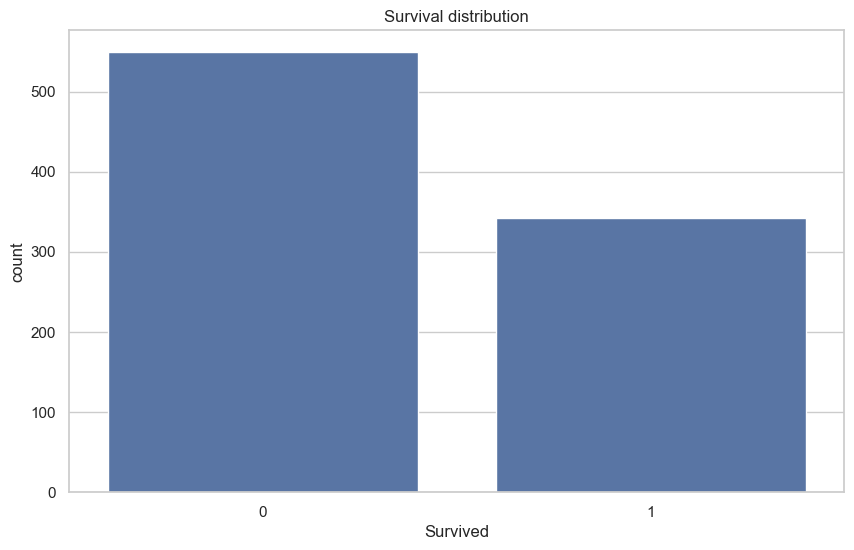

In [26]:
sns.countplot(x="Survived", data=df)
plt.title("Survival distribution")
plt.show()

### Slight imbalance in the dataset, much more passengers did not survive

## Survivors by gender

In [27]:
import os
os.getcwd()

'c:\\Users\\juras\\Desktop\\python_projects\\titanic_ml\\notebooks'

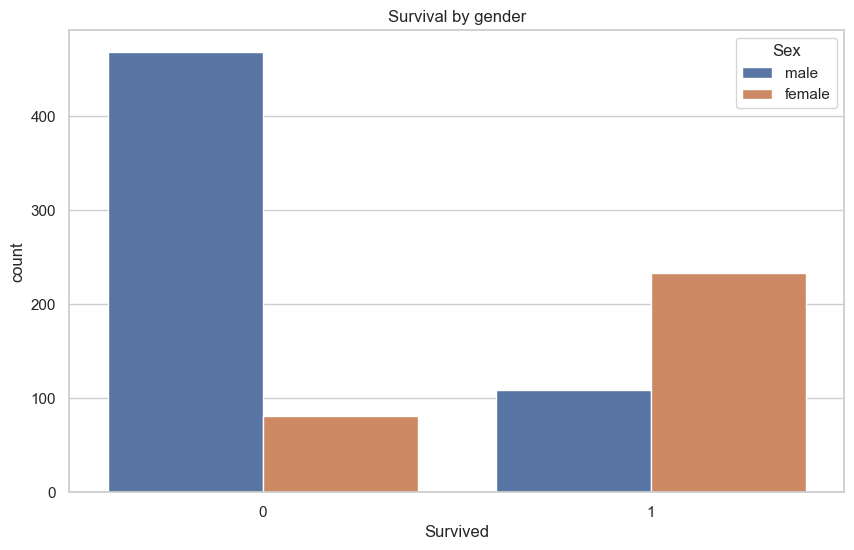

In [28]:
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival by gender")
plt.show()

### Females have a significantly higher survival rate compared to males.

## Survival by passenger class

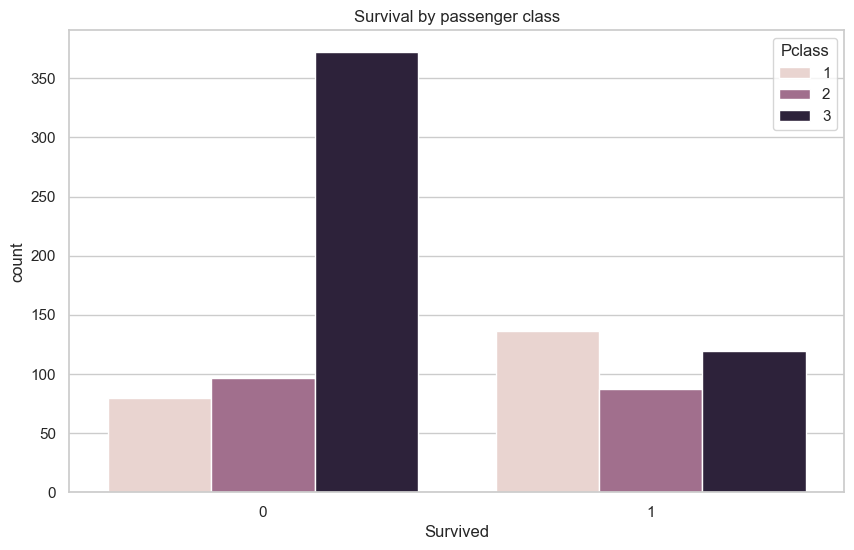

In [29]:
sns.countplot(x="Survived", hue="Pclass", data=df)
plt.title("Survival by passenger class")
plt.show()

### Higher class passengers had significantly better chance at surviving

## Age distribution

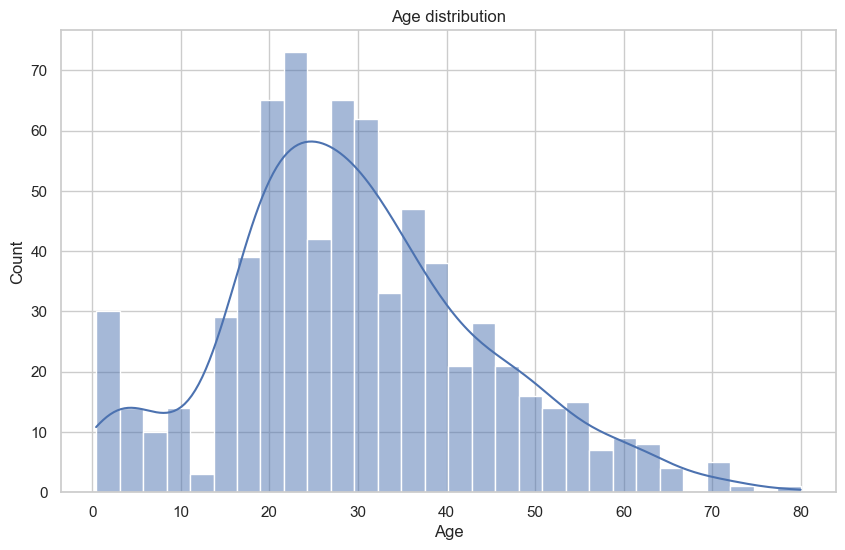

In [30]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age distribution")
plt.show()

### Most of the passengers were adults in the age of 20-40, also couple of % overall children

## Age vs survival

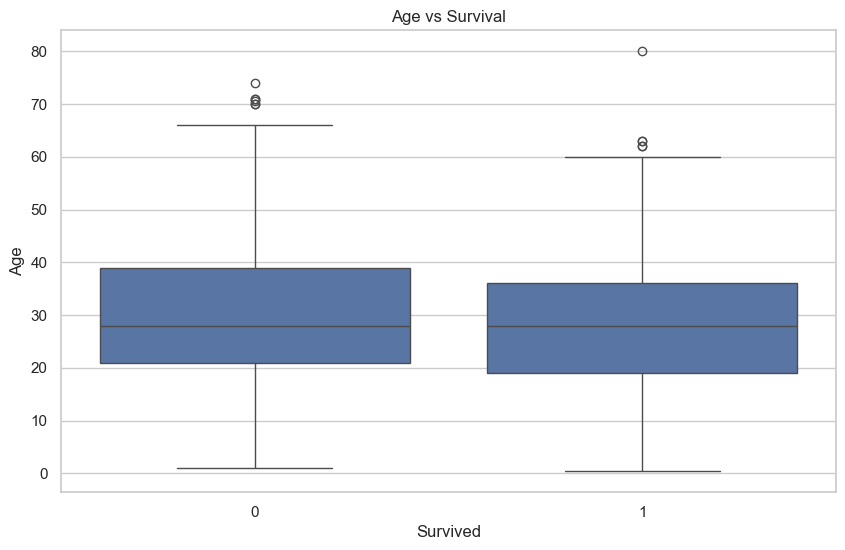

In [31]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.show()

### Survivors tend to be slightly younger

## Fare vs survival

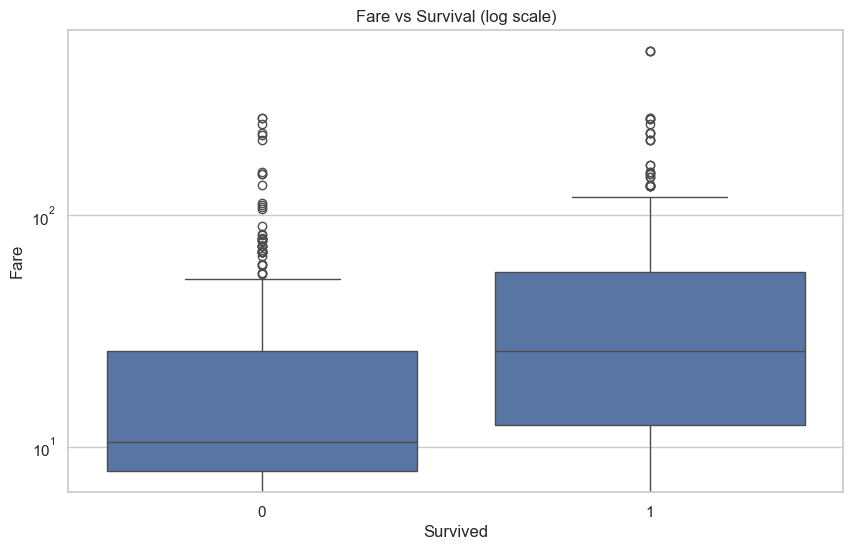

In [32]:
sns.boxplot(x="Survived", y="Fare", data=df)
plt.yscale("log")
plt.title("Fare vs Survival (log scale)")
plt.show()

### Higher ticket fares are associated with higher survival probability.

## Correlation analysis

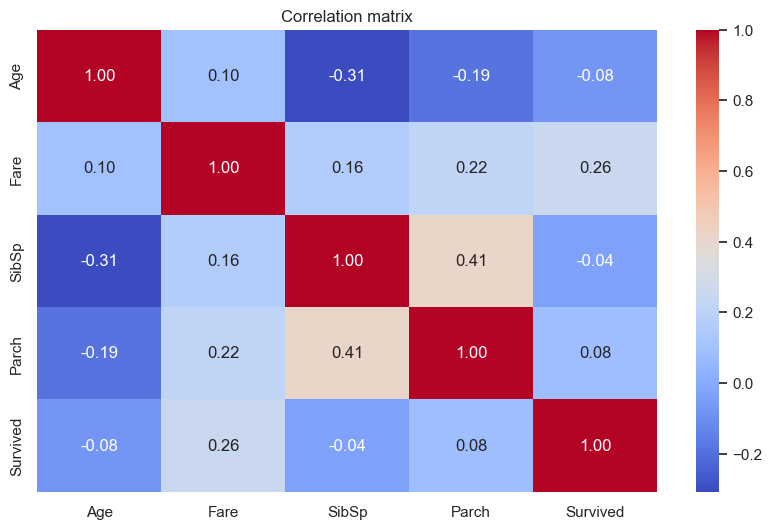

In [33]:
numeric_df = df[["Age", "Fare", "SibSp", "Parch", "Survived"]]
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

### Fare shows a moderate positive correlation with survival.

## Key info

- Gender and passenger class are strong predictors of survival.
- Age and Fare also show meaningful patterns.